
Grover's Algorithm Quantum Circuit:
        ┌─────────┐┌────┐ ░ ┌─┐      
   q_0: ┤ U2(0,π) ├┤0   ├─░─┤M├──────
        ├─────────┤│    │ ░ └╥┘┌─┐   
   q_1: ┤ U2(0,π) ├┤1 Q ├─░──╫─┤M├───
        ├─────────┤│    │ ░  ║ └╥┘┌─┐
   q_2: ┤ U2(0,π) ├┤2   ├─░──╫──╫─┤M├
        └─────────┘└────┘ ░  ║  ║ └╥┘
meas: 3/═════════════════════╩══╩══╩═
                             0  1  2 


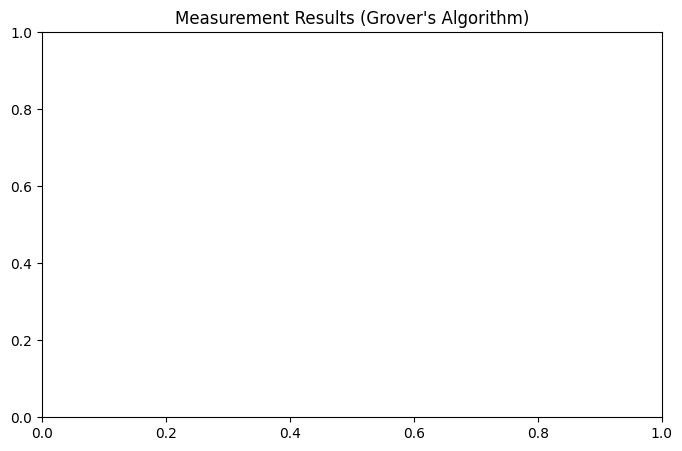

In [1]:
#-------------------------------------------------------------------------
# Grover’s Algorithm for Speedup
# Chapter 8 in the QUANTUM COMPUTING AND QUANTUM MACHINE LEARNING BOOK
#-------------------------------------------------------------------------
# Version 1.0
# (c) 2025 Jesse Van Griensven, Roydon Fraser, and Jose Rosas 
# License:  MIT - Citation of this work required
#-------------------------------------------------------------------------
# Qiskit changes frequently. 
# We recommend using the latest version from the book code repository at:
# https://github.com/pedroer/quantum-computing-for-engineers/blob/main/requirements.txt
import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram, circuit_drawer
from qiskit.circuit.library import GroverOperator
#-------------------------------------------------------------------------

def plot_quantum_circuit(qc):
    """ Visualizing Quantum Circuit """
    print("\nGrover's Algorithm Quantum Circuit:")
    print(qc.decompose())  # Print decomposed circuit
    circuit_drawer(qc, output='mpl', style={'backgroundcolor': 'white'})
    return
#-------------------------------------------------------------------------

def plot_measurement_results(counts):
    """ Visualization of Measurement Outcomes """
    plt.figure(figsize=(8, 5))
    plot_histogram(counts)
    plt.title("Measurement Results (Grover's Algorithm)")
    plt.show()
    return
#-------------------------------------------------------------------------

def create_oracle():
    """ Define a Custom Oracle (Marking |101⟩ as the solution) """
    oracle = QuantumCircuit(3)
    oracle.x(0)  # Apply X-gate to qubit 0
    oracle.h(2)  # Apply Hadamard to qubit 2
    oracle.ccx(0, 1, 2)  # Controlled-Controlled-NOT (Toffoli Gate)
    oracle.h(2)  # Hadamard back
    oracle.x(0)  # Undo X-gate
    return oracle
#-------------------------------------------------------------------------

# Create a 3-qubit Grover circuit
qc = QuantumCircuit(3)

# Apply Hadamard gates to create a superposition
qc.h([0, 1, 2])

# Apply Grover operator (oracle + diffusion)
oracle    = create_oracle()
grover_op = GroverOperator(oracle=oracle)
qc.append(grover_op, [0, 1, 2])

# Measure the qubits
qc.measure_all()

# Simulate the circuit
simulator = Aer.get_backend('aer_simulator')
result    = execute(qc, simulator).result()
counts    = result.get_counts()

# Execute visualizations
plot_quantum_circuit(qc)
plot_measurement_results(counts)